# Librerias

In [1]:
#Importamos las librerías estándar
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Importamos las librerías de Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Conexión a repositorio de datos

In [3]:
#Nos conectamos a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [4]:
#El dataset está conformado por dos columnas
# - Time (min): Tiempo en minutos que el usuario navegó en la página
# - Buy: Bandera que indica si compró (1) o no compró (1) un producto
df = pd.read_csv('/content/drive/MyDrive/Data/compras.csv')
df

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1
...,...,...
95,3.750000,1
96,3.883333,1
97,1.566667,0
98,1.666667,0


In [5]:
#Vamos a renombrar la cabecera "Time (min)" por una mejor: "Time"
df = df.rename(columns={'Time (min)': 'Time'})
df

,Time,Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1
...,...,...
95,3.750000,1
96,3.883333,1
97,1.566667,0
98,1.666667,0


# Definicion de features

In [6]:
x = df['Time'].values
x

array([2.        , 0.68333333, 3.21666667, 0.9       , 1.53333333,
       2.88333333, 0.8       , 1.46666667, 1.11666667, 0.6       ,
       1.35      , 3.18333333, 2.76666667, 2.18333333, 1.5       ,
       1.33333333, 1.53333333, 0.78333333, 2.98333333, 4.15      ,
       0.85      , 2.03333333, 1.6       , 2.61666667, 2.68333333,
       1.95      , 0.46666667, 2.71666667, 2.33333333, 3.41666667,
       0.26666667, 1.38333333, 0.51666667, 2.7       , 2.05      ,
       2.95      , 1.23333333, 3.61666667, 1.43333333, 2.06666667,
       2.06666667, 1.5       , 2.43333333, 2.95      , 2.21666667,
       0.91666667, 2.1       , 3.75      , 1.        , 0.        ,
       2.65      , 1.55      , 1.06666667, 2.01666667, 0.        ,
       0.        , 0.66666667, 2.51666667, 1.06666667, 1.25      ,
       2.95      , 0.        , 1.96666667, 2.2       , 2.9       ,
       3.85      , 2.38333333, 2.08333333, 3.18333333, 3.86666667,
       2.18333333, 2.83333333, 2.73333333, 1.38333333, 1.16666

# Definición de labels

In [7]:
y = df['Buy'].values
y

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

# Graficamos los features y labels

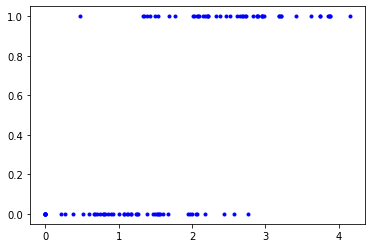

In [8]:
#Graficamos como nube de puntos
#vemos que en el eje Y los puntos solo toman dos valores 1 (COMPRÓ) y 0 (NO COMPRÓ)
plt.plot(x, y, 'b.')

# Definimos nuestro objetivo

Nuestro objetivo es hacer un modelo de clasificación binaria, el cual dirá si una persona compra (1) o no (0) un producto en la web

Aquí ya no usaremos una regresión lineal, ya que la regresión lineal está orientada a encontrar valores continuos, como el ejemplo de predecir el peso de una persona según su estatura.

Necesitaremos otra herramienta conocida como "REGRESIÓN LOGÍSTICA BINARIA"

Una regresión logística binaria sólo nos puede devolver dos valores, o bien "0" o bien "1".

Para que una regresión lineal se convierta en una regresión logística, a nuestro perceptrón le tenemos que agregar una función de activación conocida como **"SIGMOIDE"**.

# Configuración del modelo

In [9]:
#Instanciamos un modelo
model = Sequential()

In [10]:
#Le agregamos un perceptrón al modelo, el cual usará la función de activación "SIGMOIDE"
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [11]:
#Compilamos el modelo
#En este caso la medida del error será la entropía cruzada (binary_crossentropy)
###Define en donde colocar el punto de quiebre al curvar la línea. Para reducir los errores.
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
#Vemos el resumen
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento del modelo

In [18]:
#Entrenaremos el modelo con el 100% de los datos
#Entrenamos el modelo con 25 iteraciones
model.fit(x, y, epochs = 25)

Epoch 1/25
4/4 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8000
Epoch 2/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8200
Epoch 3/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8300
Epoch 4/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8200
Epoch 5/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8200
Epoch 6/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8300
Epoch 7/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8200
Epoch 8/25
4/4 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8200
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8100
Epoch 10/25
4/4 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.8400
Epoch 11/25
4/4 [======================

# Uso del modelo

In [19]:
#Con los features X obtenemos las predicciones Y que el modelo obtiene
y_prediccion = model.predict(x)

#Notemos que se supone que el modelo debe decir si una persona COMPRARÁ (1) o NO COMPRARÁ (0) el producto
#Aquellos valores que estén por encima de 0.5, los interpretaremos como "1"
#Aquellos valores que estén por debajo de 0.5, los interpretaremos como "0"
y_prediccion

array([[0.6544177 ],
       [0.06632242],
       [0.9752117 ],
       [0.10867539],
       [0.3716554 ],
       [0.9448575 ],
       [0.08677259],
       [0.33373165],
       [0.17306155],
       [0.05455765],
       [0.2724427 ],
       [0.97312105],
       [0.9275872 ],
       [0.74944574],
       [0.3524611 ],
       [0.26428342],
       [0.3716554 ],
       [0.08353546],
       [0.95649767],
       [0.9975263 ],
       [0.09717473],
       [0.6729663 ],
       [0.4112288 ],
       [0.89808977],
       [0.9123292 ],
       [0.62570614],
       [0.03973931],
       [0.9187534 ],
       [0.81300926],
       [0.9847976 ],
       [0.02451706],
       [0.2892257 ],
       [0.04477969],
       [0.9155967 ],
       [0.68204594],
       [0.95290494],
       [0.21871442],
       [0.9907119 ],
       [0.31551242],
       [0.6909893 ],
       [0.6909893 ],
       [0.3524611 ],
       [0.8480046 ],
       [0.95290494],
       [0.7647274 ],
       [0.11276695],
       [0.7084495 ],
       [0.993

# Graficamos el modelo

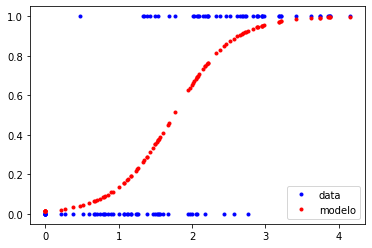

In [20]:
#Graficamos la nube de puntos real
plt.plot(x, y, 'b.')

#Graficamos los puntos devueltos por el modelo
plt.plot(x, y_prediccion, 'r.')

#Le agregamos una leyenda
#La leyende se agrega en el orden en que hemos colocado los gráficos
plt.legend(['data', 'modelo'])

#Podemos notar que el modelo está construyendo una función sigmoide
#Esta función oscila entre 0 y 1
#Aquellos valores que estén por encima de 0.5, los interpretaremos como "1"
#Aquellos valores que estén por debajo de 0.5, los interpretaremos como "0"

# Convertimos las predicciones del modelo a "1" y "0"

In [ ]:
#El modelo nos está devolviendo estos valores probabilísticos
y_prediccion

array([[0.5223056 ],
       [0.12335628],
       [0.8790929 ],
       [0.16470465],
       [0.34583256],
       [0.81226623],
       [0.14438328],
       [0.32273707],
       [0.21649   ],
       [0.10999525],
       [0.28436852],
       [0.8734664 ],
       [0.7829821 ],
       [0.5926105 ],
       [0.33418548],
       [0.27911666],
       [0.34583256],
       [0.14120659],
       [0.83486724],
       [0.9688486 ],
       [0.15427056],
       [0.5352385 ],
       [0.36967865],
       [0.7406887 ],
       [0.7601249 ],
       [0.5028555 ],
       [0.09125423],
       [0.76946115],
       [0.64756346],
       [0.9084876 ],
       [0.06850687],
       [0.2950488 ],
       [0.09791964],
       [0.7648251 ],
       [0.5416883 ],
       [0.8275863 ],
       [0.24888518],
       [0.9312945 ],
       [0.3114974 ],
       [0.54812425],
       [0.54812425],
       [0.33418548],
       [0.68223584],
       [0.8275863 ],
       [0.6050791 ],
       [0.16830638],
       [0.5609457 ],
       [0.943

In [21]:
#Vamos a convertirlos a valores binarios (0 y 1)

#Compararemos cada elemento del array con 0.5, si es mayor le colocará un True, si es menor, le colocará un False
y_prediccion_binaria = y_prediccion > 0.5

#Vemos la data como decisión binaria
y_prediccion_binaria

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

# Cálculo del accuracy del modelo

In [22]:
#Importamos la librería de accuracy
from sklearn.metrics import accuracy_score

In [23]:
#Comparamos los valores reales con los valores predichos binarizados
accuracy_score(y, y_prediccion_binaria)

0.83

In [ ]:
#Tenemos un modelo que ha descubierto el 82% de los patrones